In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()


# Lecture 06
In this notebook, we cover the first part of [R4DS §7](http://r4ds.had.co.nz/exploratory-data-analysis.html):

* [Visualizing distributions](#Visualizing-distributions)
* [Typical and Unusual Values](#Typical-and-Unusual-Values)
* [Missing Values](#Missing-Values)

To make things more interesting we are going to look at a different data set than the one in the book. The dataset contains information on [billionaires](https://think.cs.vt.edu/corgis/csv/billionaires/billionaires.html): who they are, where they are from, how & when they made their fortune, etc.

![billionaire](http://www.internationalinvestment.net/wp-content/uploads/2016/08/Rich-HNWI-billionaire-lighting-cigar-Shutterstock-740x360.jpg)

In [38]:
# If you are not working on the server, run this command to download the data set
# load(url('https://github.com/terhorst/stats306/raw/master/lecture06/bil.RData'))
load("bil.RData")
bil %>% print

# A tibble: 2,614 x 22
     age category  citizenship company.name company.type `country code` founded
   <int> <chr>     <chr>       <chr>        <chr>        <chr>            <int>
 1    -1 Financial Saudi Arab… Rolaco Trad… new          SAU               1968
 2    34 Financial United Sta… Fidelity In… new          USA               1946
 3    59 Non-Trad… Brazil      Companhia B… new          BRA               1948
 4    61 New Sect… Germany     Ratiopharm   new          DEU               1881
 5    -1 Financial Hong Kong   Swire        new          HKG               1816
 6    -1 Traded S… Bahrain     YBA Kanoo    new          BHR               1890
 7    -1 New Sect… Japan       Otsuka Hold… new          JPN               1921
 8    -1 Traded S… Japan       Sony         new          JPN               1946
 9    66 Financial Japan       Mori Buildi… new          JPN               1959
10    -1 Traded S… France      Chanel       new          FRA               1909
# ... with 2,604 

### Review problem

`load(url('https://github.com/terhorst/stats306/raw/master/lecture06/bil.RData'))`
`bil`

(Basic)
Who is the youngest billionaire in this dataset?

(Advanced)
Which country has the most billionaires under 30? Which country has the most billionaires over 90?

In [56]:
# Solution
bil %>% group_by(citizenship) %>% select(age) %>% 
        summarize(u30=sum(age > 0 & age < 30), o90=sum(age > 90))  %>% arrange(desc(o90))


Adding missing grouping variables: `citizenship`


   citizenship          u30 o90
1  United States        5   9  
2  Germany              2   3  
3  Canada               0   2  
4  France               0   2  
5  Australia            0   1  
6  Austria              0   1  
7  Brazil               0   1  
8  Philippines          0   1  
9  Saudi Arabia         0   1  
10 Taiwan               0   1  
11 Algeria              0   0  
12 Angola               0   0  
13 Argentina            0   0  
14 Bahrain              0   0  
15 Belgium              0   0  
16 Bermuda              0   0  
17 Chile                0   0  
18 China                0   0  
19 Colombia             0   0  
20 Cyprus               0   0  
21 Czech Republic       0   0  
22 Denmark              0   0  
23 Ecuador              0   0  
24 Egypt                0   0  
25 Finland              0   0  
26 Georgia              0   0  
27 Greece               0   0  
28 Guernsey             0   0  
29 Hong Kong            1   0  
30 India                1   0  
⋮  ⋮    

## Visualizing distributions
Recall that a **categorical** variable is one that can only take one of a (small) finite number of values. For example, in the `billionaire` data set, `region` is a categorical variable.

In [3]:
bil %>% select(region) %>% print

# A tibble: 2,614 x 1
   region                  
   <chr>                   
 1 Middle East/North Africa
 2 North America           
 3 Latin America           
 4 Europe                  
 5 East Asia               
 6 Middle East/North Africa
 7 East Asia               
 8 East Asia               
 9 East Asia               
10 Europe                  
# ... with 2,604 more rows


Say we are interested in the distribution of `region`. We can plot a bar chart to visualize this:

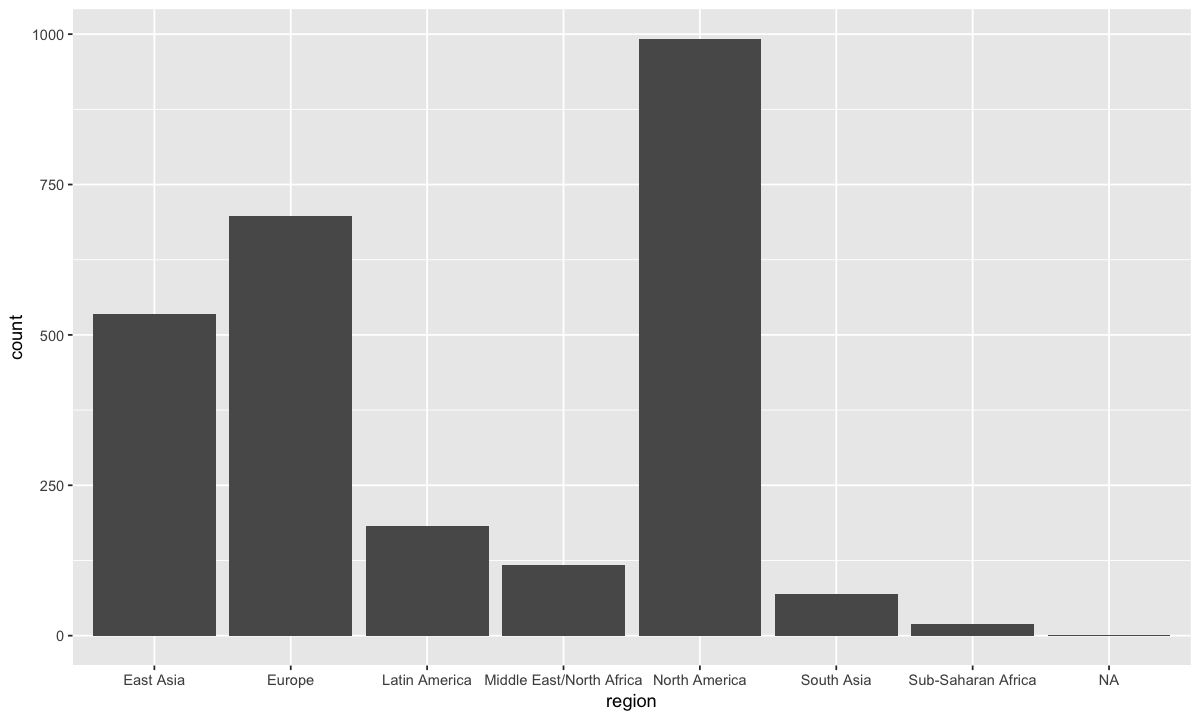

In [4]:
ggplot(data = bil) + geom_bar(mapping = aes(x = region))

Here ggplot has done some work for us: it has grouped the data by region, summarized it, and plotted a bar graph of the result. Let's reproduce this ourselves using the knowledge we have gained from §5:

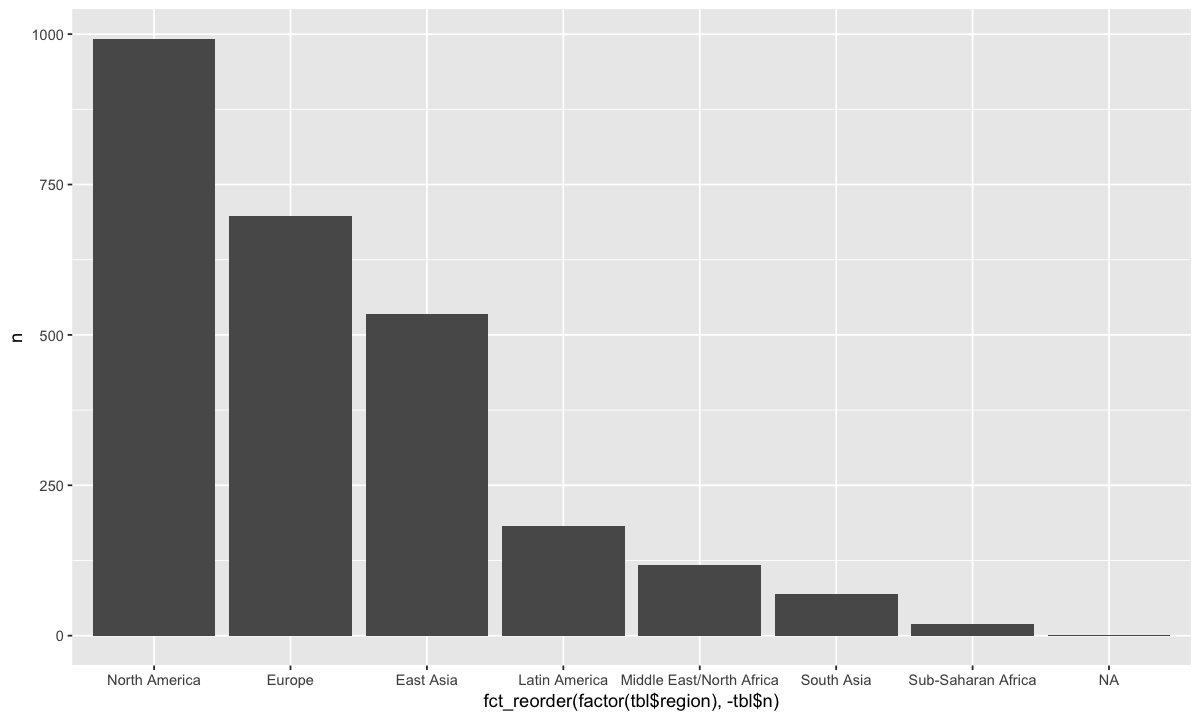

In [70]:
bil %>% count(region) %>% ggplot + geom_col(aes(x=fct_reorder (factor(tbl$region), -tbl$n), y=n))

The plot looks better if we sort it:

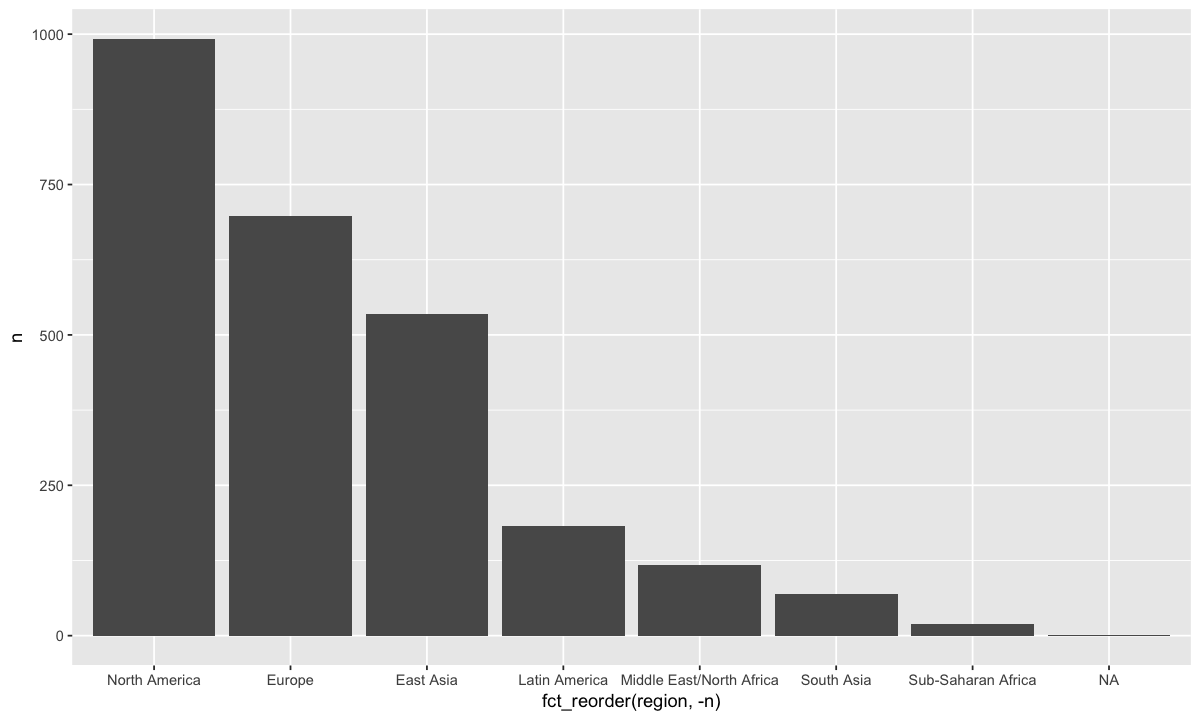

In [7]:
bil %>% count(region) %>% ggplot(aes(x=fct_reorder(region, -n), y=n)) + geom_col()

## Continuous random variables
We cannot directly use a bar plot to visualize a continuous random variable, because every observation potentially has a different value. Instead we create a **histogram**. The command to do this is **geom_histogram**.

Let's visualize the distribution of wealth among billionaires. 

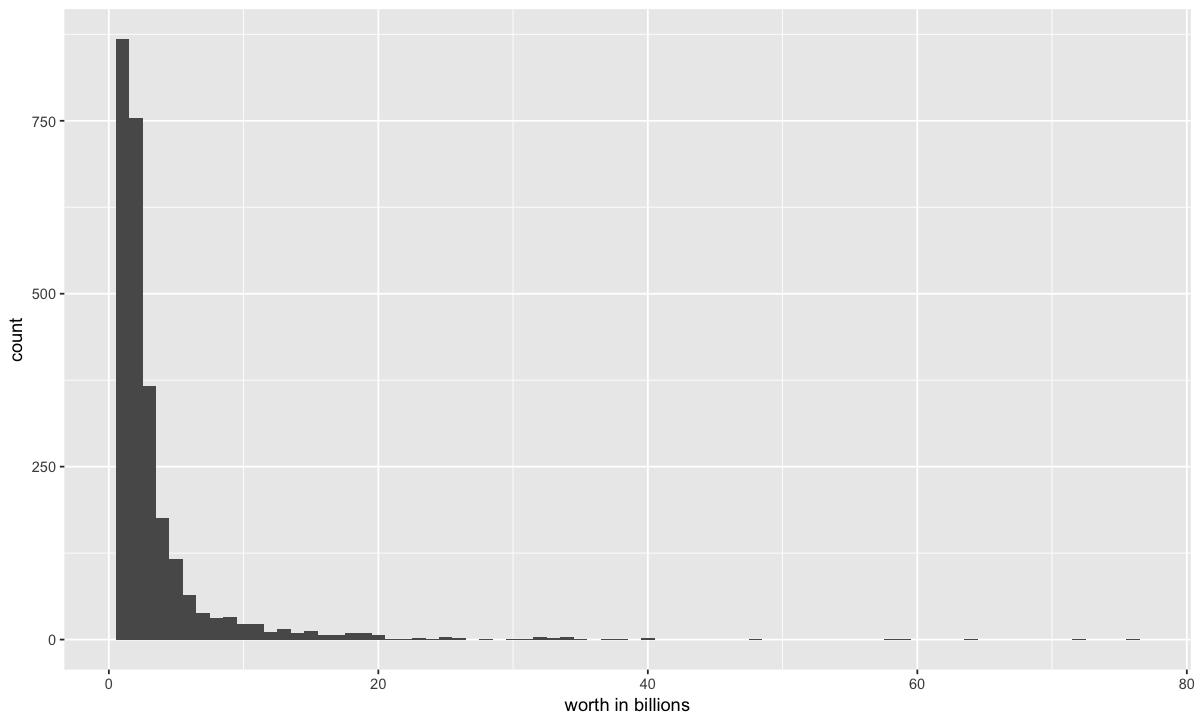

In [76]:
ggplot(data = bil) +
        geom_histogram(mapping = aes(x = `worth in billions`), binwidth = 1
                    )

Most billionaires are worth a paltry \\$1-5b. However, the distribution has a "long tail": there are some billionaires who are worth as much as \\$60-80b. Interestingly, the income distribution among billionaires looks quite a bit like the income distribution in society as a whole. Even the .001% have their 1%.

Since most billionaires seem to be worth less than $20b, let's zoom in to that part of the plot:

Warning message:
“package ‘bindrcpp’ was built under R version 3.4.4”

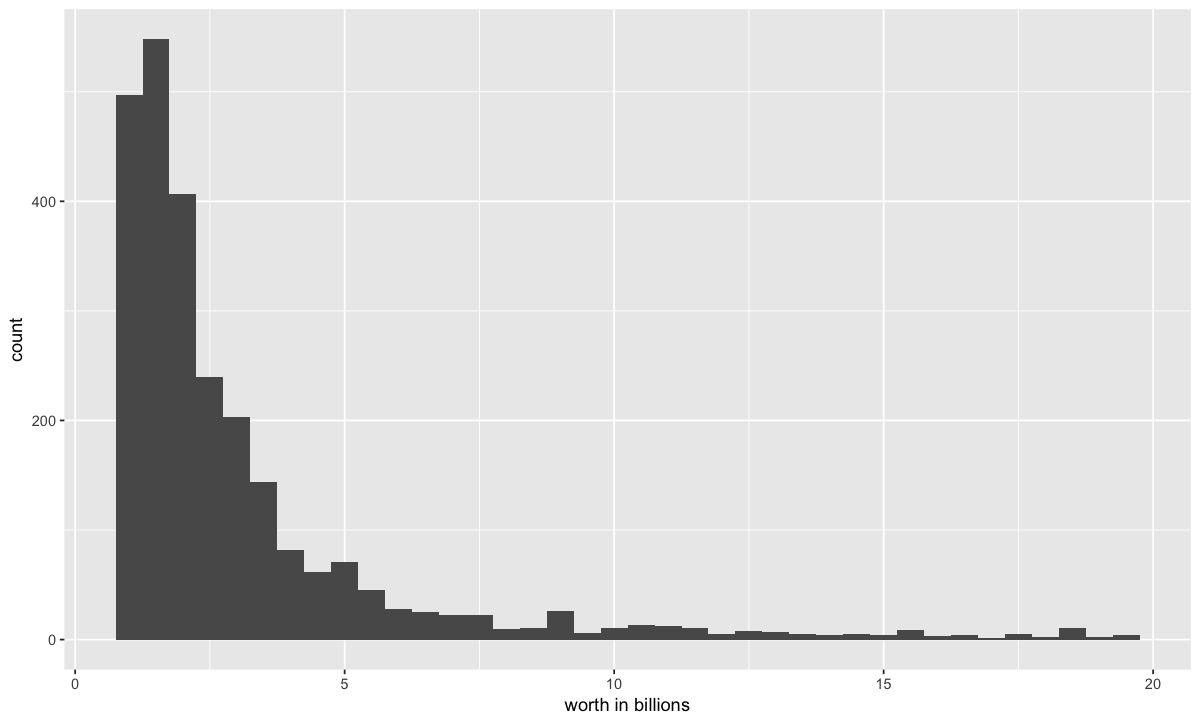

In [7]:
bil %>%
    filter(`worth in billions` < 20) %>%
    ggplot + geom_histogram(mapping = aes(x = `worth in billions`), binwidth = .5)

Notice how I made the `binwidth` smaller to try and capture more detail. This lead to a rougher plot. Selecting the correct binwidth is a non-trivial problem, usually resolved by experimentation.

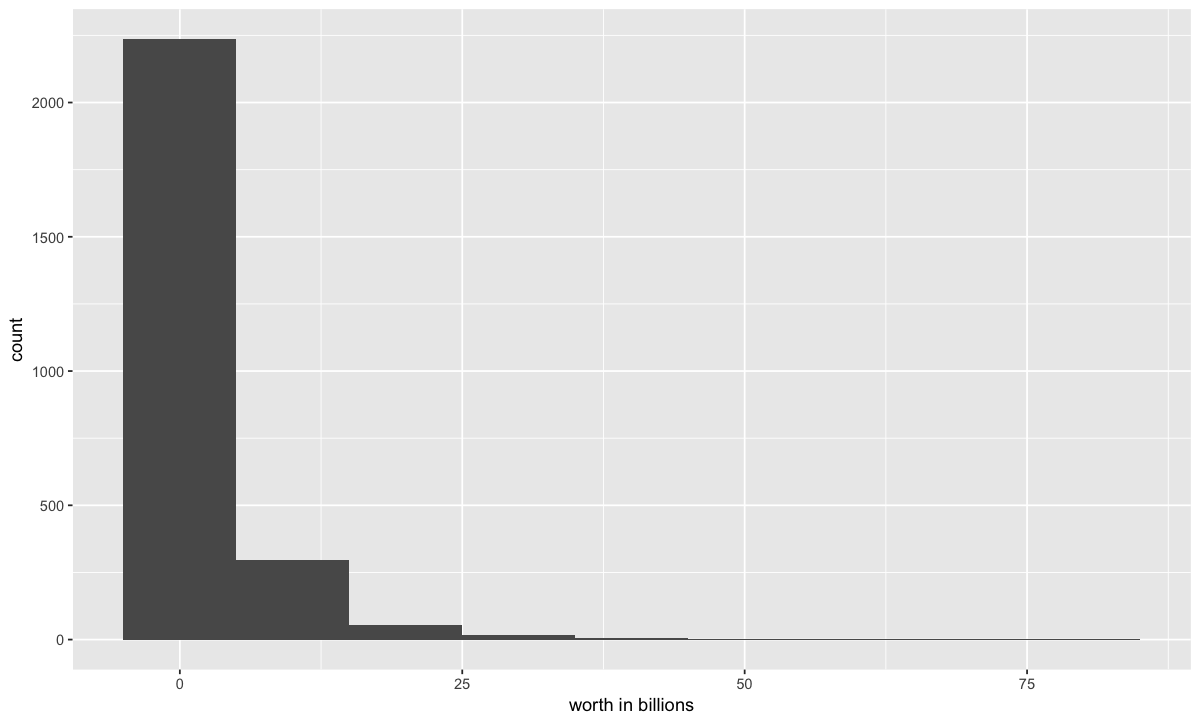

In [8]:
bil %>% ggplot() + geom_histogram(mapping = aes(x = `worth in billions`), binwidth = 10)

To gain intuition for how histograms work we are going to reproduce one by hand. To do this we'll use a function called `cut_width`. This function takes a real-valued vector `v` and a number `k`, and counts how many observations fall into buckets of width `k`. It's easiest to see with an example:

In [80]:
bil_buck <- bil %>% select(`worth in billions`) %>% mutate(bucket=cut_width(`worth in billions`, 1)) %>% print

# A tibble: 2,614 x 2
   `worth in billions` bucket   
                 <dbl> <fct>    
 1                 1   [0.5,1.5]
 2                 2.5 (1.5,2.5]
 3                 1.2 [0.5,1.5]
 4                 1   [0.5,1.5]
 5                 2.2 (1.5,2.5]
 6                 1   [0.5,1.5]
 7                 2.2 (1.5,2.5]
 8                 2.3 (1.5,2.5]
 9                 3.9 (3.5,4.5]
10                 2   (1.5,2.5]
# ... with 2,604 more rows


The histogram is essentially a bar plot of this factor:

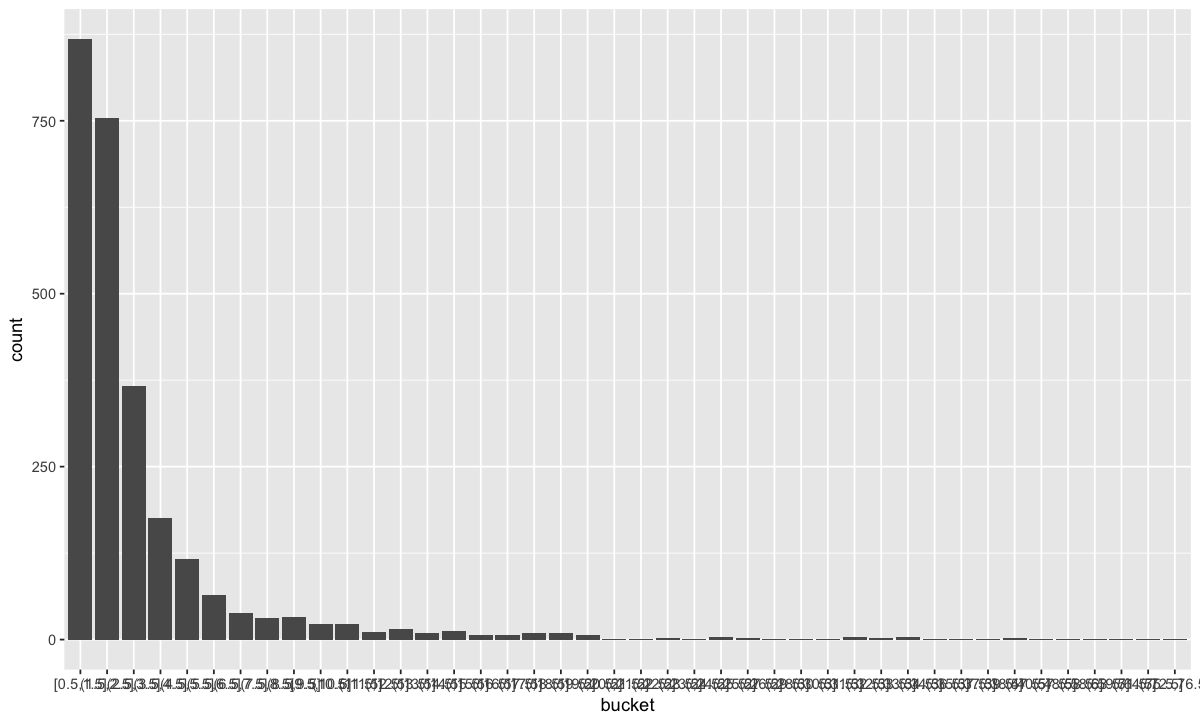

In [10]:
ggplot(bil_buck) + geom_bar(aes(x=bucket)) 

Let us bring in the categorical variable **region** and map the fill aesthetic to it.

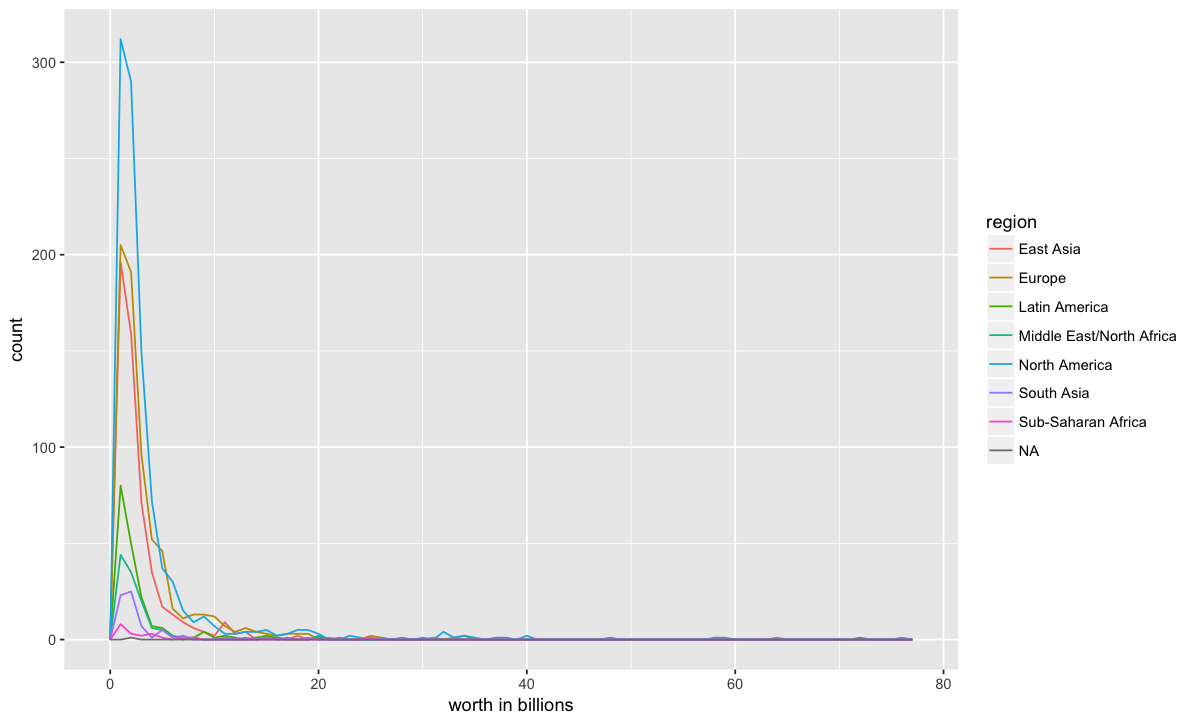

In [82]:
bil %>% ggplot + geom_freqpoly(mapping = aes(x = `worth in billions`, color = region), binwidth = 1)

This is more informative but not very clean. Let us use a new geometry **freqpoly** which is like histogram but shows lines. Overlapping lines are easier to see than overlapping bars.

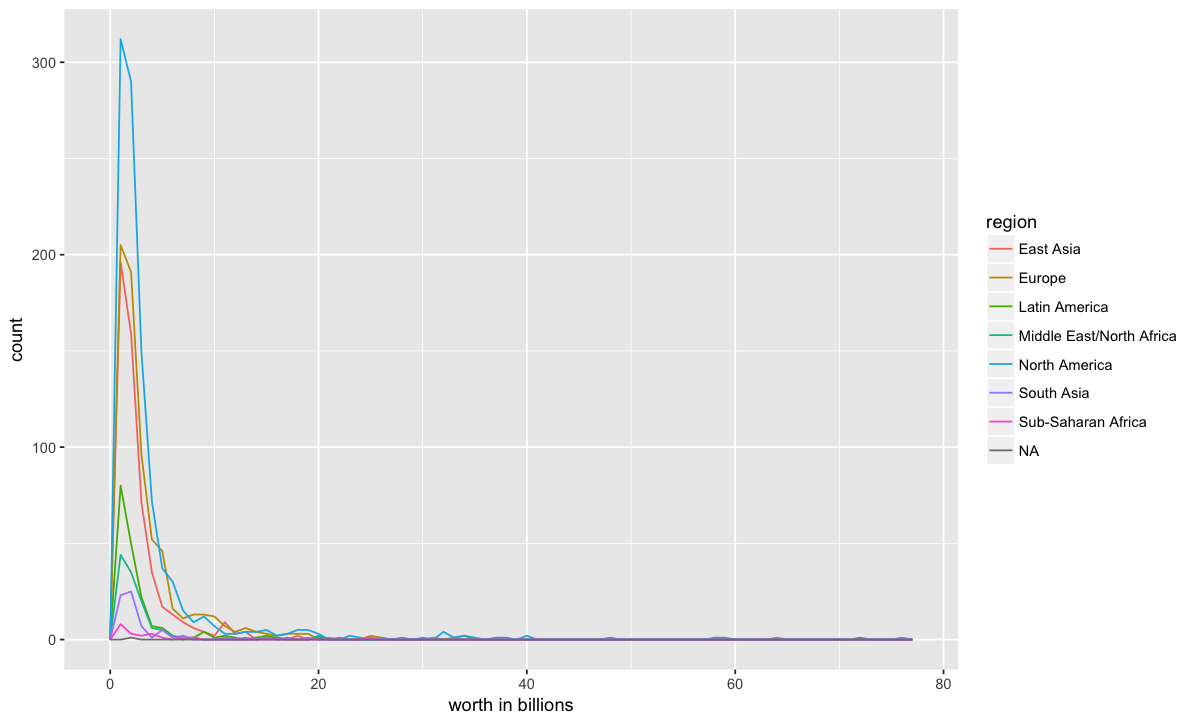

In [12]:
bil %>% ggplot() +
        geom_freqpoly(mapping = aes(x = `worth in billions`, color = region), binwidth = 1)

The range of this plot is too large; it's hard to compare the billionaires who are worth less than $20b with the very very rich ones on the right-hand side of the plot. We could filter and re-plot as above, but here is another idea:

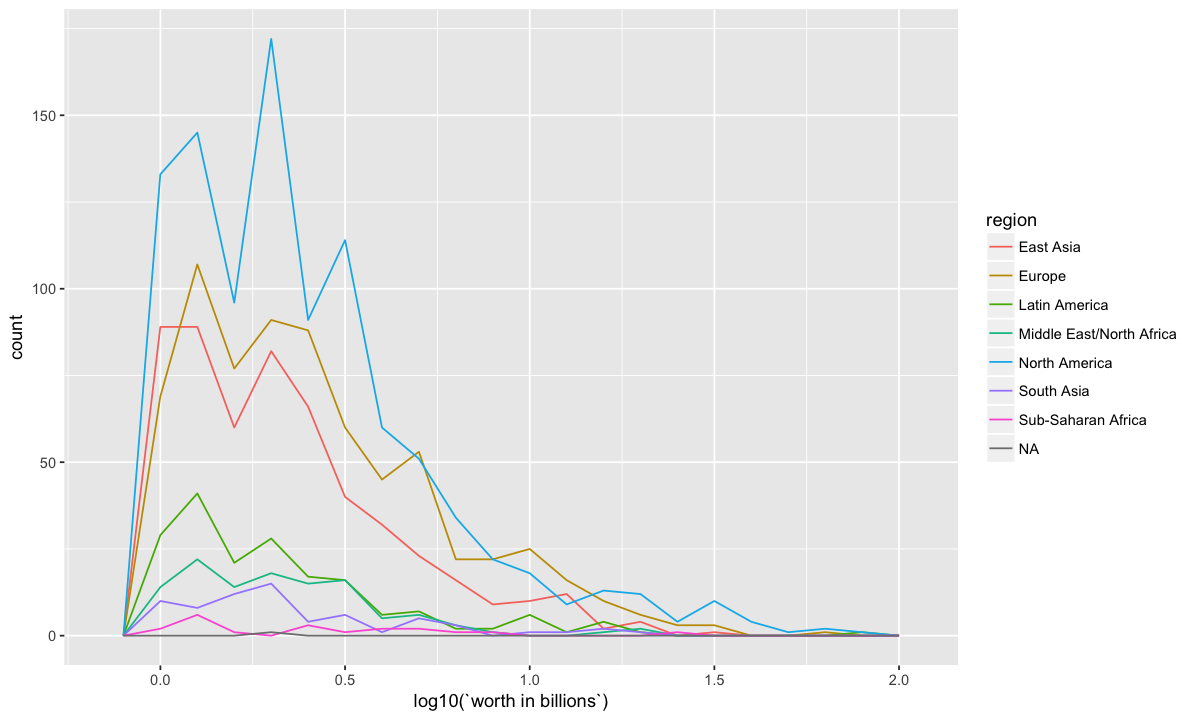

In [13]:
bil %>% ggplot() +
        geom_freqpoly(mapping = aes(x = log10(`worth in billions`), color = region), binwidth = .1)

## Typical and Atypical Values
In EDA, it is a good idea to try and get a sense of what constitutes a "typical" value in your data. Let's look at the disribution of the ages of billionaires:

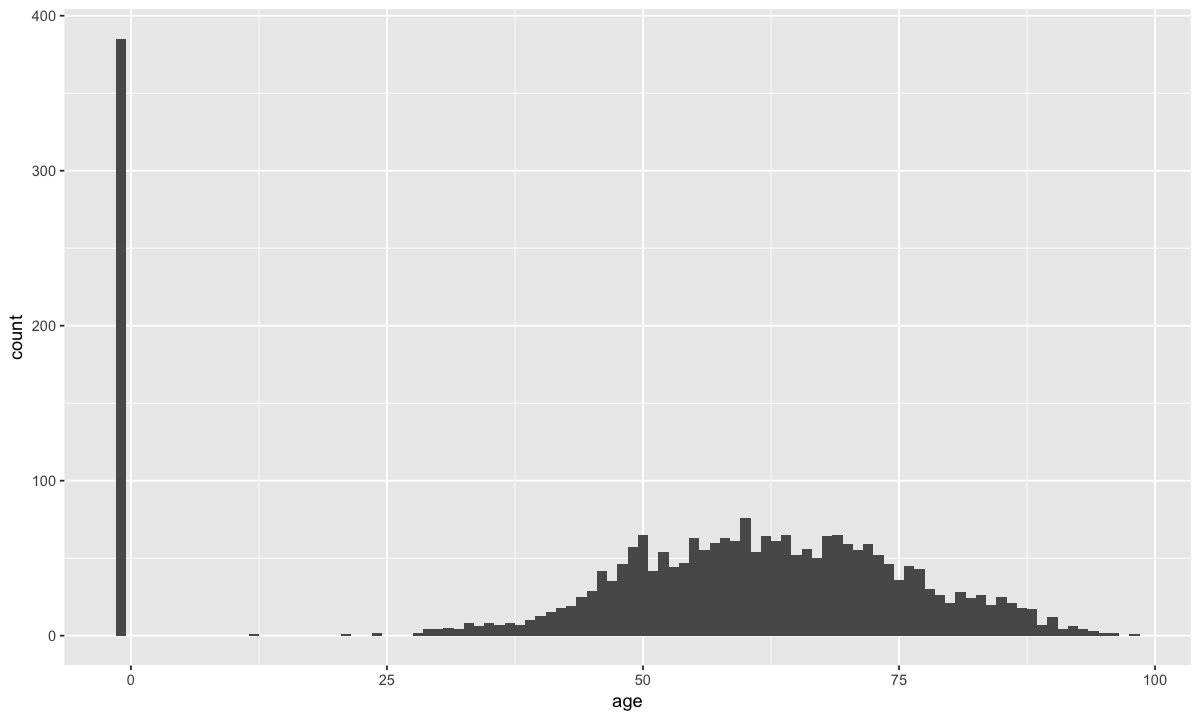

In [14]:
ggplot(data = bil) +
    geom_histogram(mapping = aes(x = age), binwidth = 1)

Typical values of `age` in these data range from about 30 to 90. We see a very unusual spike around zero:

In [45]:
filter(bil, age < 10) %>% arrange(age) %>% print

# A tibble: 385 x 22
     age category  citizenship company.name company.type `country code` founded
   <int> <chr>     <chr>       <chr>        <chr>        <chr>            <int>
 1    -1 Financial Saudi Arab… Rolaco Trad… new          SAU               1968
 2    -1 Financial Hong Kong   Swire        new          HKG               1816
 3    -1 Traded S… Bahrain     YBA Kanoo    new          BHR               1890
 4    -1 New Sect… Japan       Otsuka Hold… new          JPN               1921
 5    -1 Traded S… Japan       Sony         new          JPN               1946
 6    -1 Traded S… France      Chanel       new          FRA               1909
 7    -1 Non-Trad… Mexico      Groupo IUSA  new          MEX               1939
 8    -1 Financial Mexico      Pulsar Inte… new          MEX               1981
 9    -1 Traded S… Netherlands Heineken In… new          NLD               1864
10    -1 <NA>      United Sta… MBNA         subsidiary   USA               1982
# ... with 375 more

These represent missing data where we do not know the person's age. We'll fix this by *recoding* all values of -1 to `NA`:

In [85]:
bil <- mutate(bil, age = ifelse(age == -1, NA, age)) %>% print

# A tibble: 2,614 x 22
     age category  citizenship company.name company.type `country code` founded
   <int> <chr>     <chr>       <chr>        <chr>        <chr>            <int>
 1    NA Financial Saudi Arab… Rolaco Trad… new          SAU               1968
 2    34 Financial United Sta… Fidelity In… new          USA               1946
 3    59 Non-Trad… Brazil      Companhia B… new          BRA               1948
 4    61 New Sect… Germany     Ratiopharm   new          DEU               1881
 5    NA Financial Hong Kong   Swire        new          HKG               1816
 6    NA Traded S… Bahrain     YBA Kanoo    new          BHR               1890
 7    NA New Sect… Japan       Otsuka Hold… new          JPN               1921
 8    NA Traded S… Japan       Sony         new          JPN               1946
 9    66 Financial Japan       Mori Buildi… new          JPN               1959
10    NA Traded S… France      Chanel       new          FRA               1909
# ... with 2,604 

A good way to get a sense of typical values is by looking at percentiles. The $p$th percentile of a column is the number $x$ for which $p$% of the values are less than or equal to $x$. The best known example is the *median*: half the values are below the median.

In [17]:
(q = quantile(bil$age, probs=c(.01, .5, .99), na.rm=T))

   1%   50%   99% 
32.28 62.00 90.00 

This tells us that 98% of the billionaires are between 32 and 90. Let us redo the visualization with extreme values filtered out.

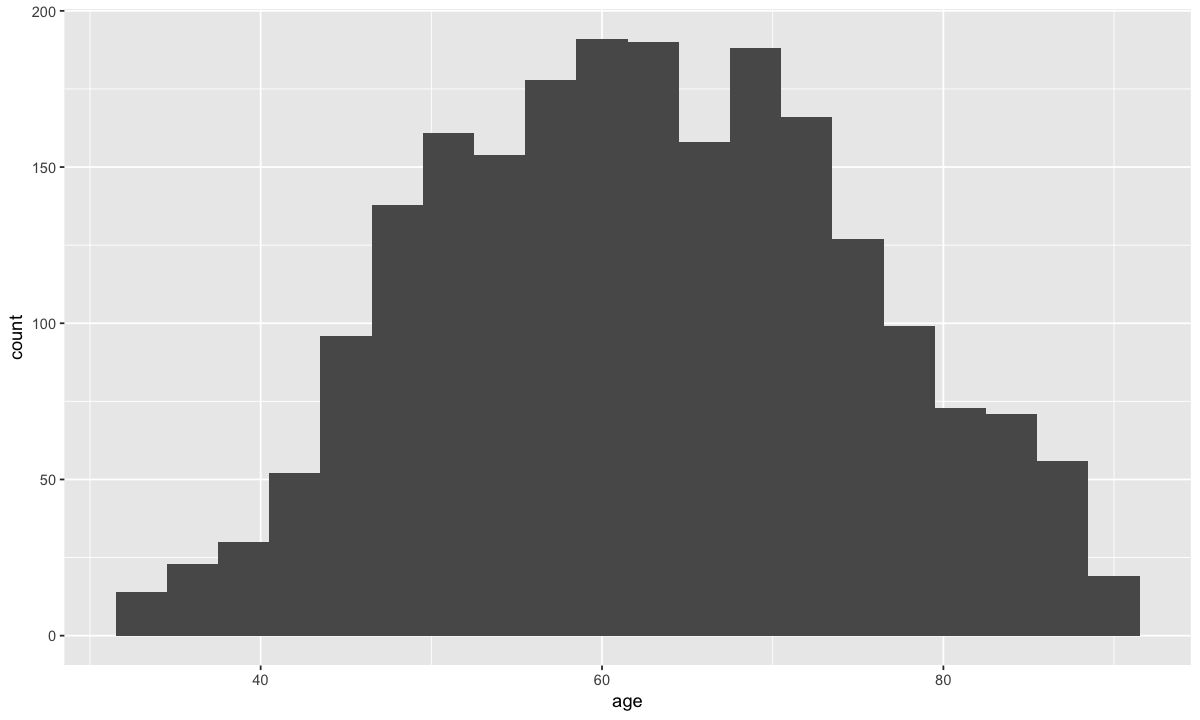

In [86]:
filter(bil, age >= q[1], age <= q[3]) %>%
    ggplot() +
        geom_histogram(mapping = aes(x = age), binwidth = 3) 

#### (Interactive) Challenge Problem
Make a plot that compares the age, net worth, and region of billionaires.

Warning message:
“Removed 385 rows containing non-finite values (stat_binhex).”

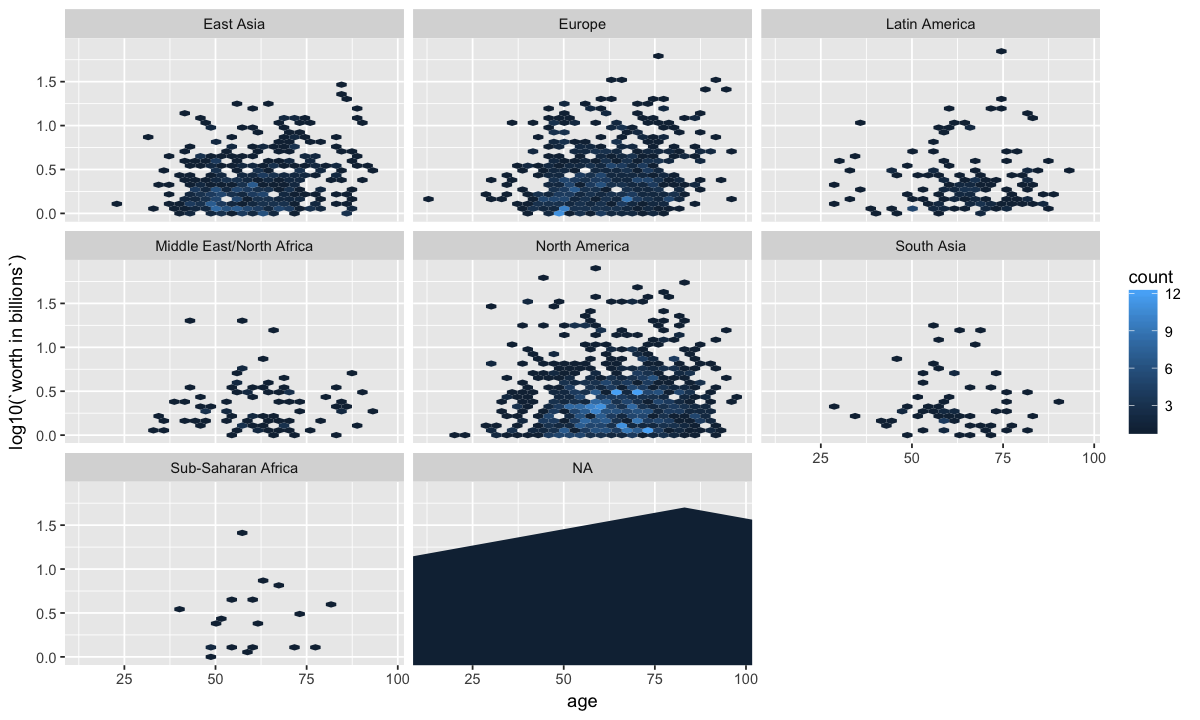

In [93]:
bil %>% ggplot + geom_hex(aes(x=age, y=log10(`worth in billions`))) + facet_wrap(~ region)

## Diamond pricing
Here is another example where EDA turns up something unexpected. Let's look at the distribution of `diamonds$price`.

In [19]:
summarize(diamonds, max = max(price), min = min(price))

  max   min
1 18823 326

The price ranges from 18,823 USD down to 326 USD. Let us initially choose a bin width of 1000 USD, which will give us about 20 bins.

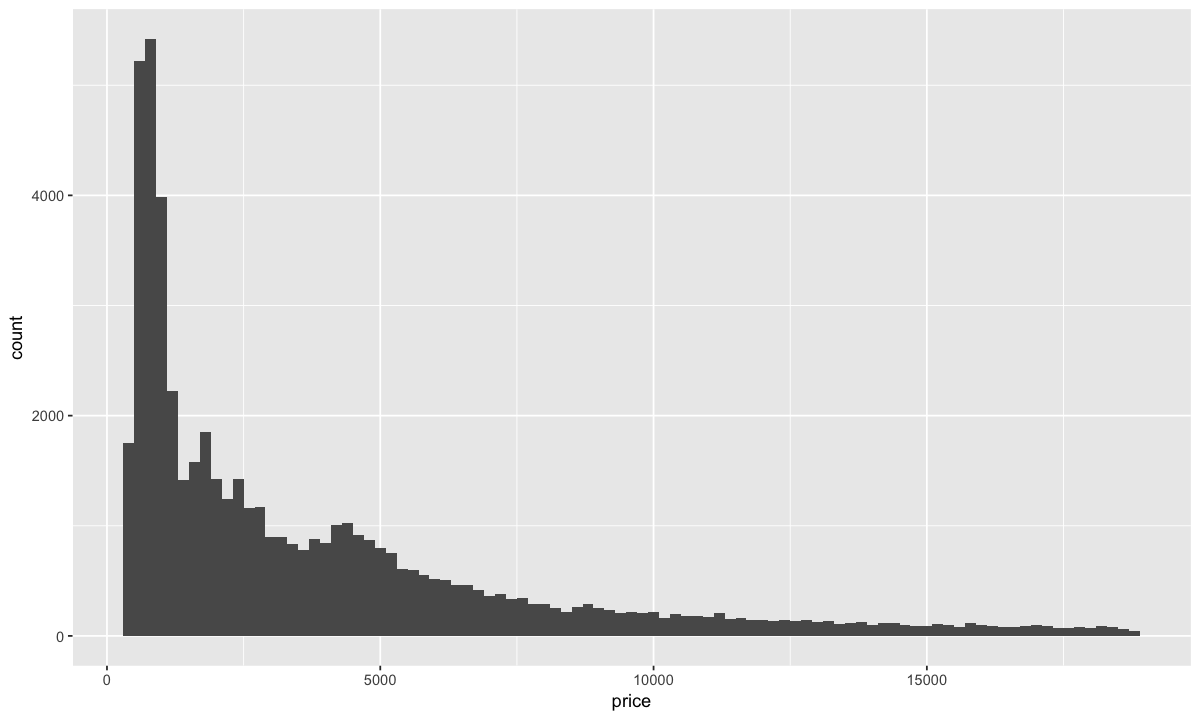

In [94]:
ggplot(data = diamonds) +
    geom_histogram(mapping = aes(x = price), binwidth = 200)

This makes sense. The distribution peaks well below 2,500 USD and decays slowly towards very high prices.

Let us change to a bin width of 100 to see a surprise!

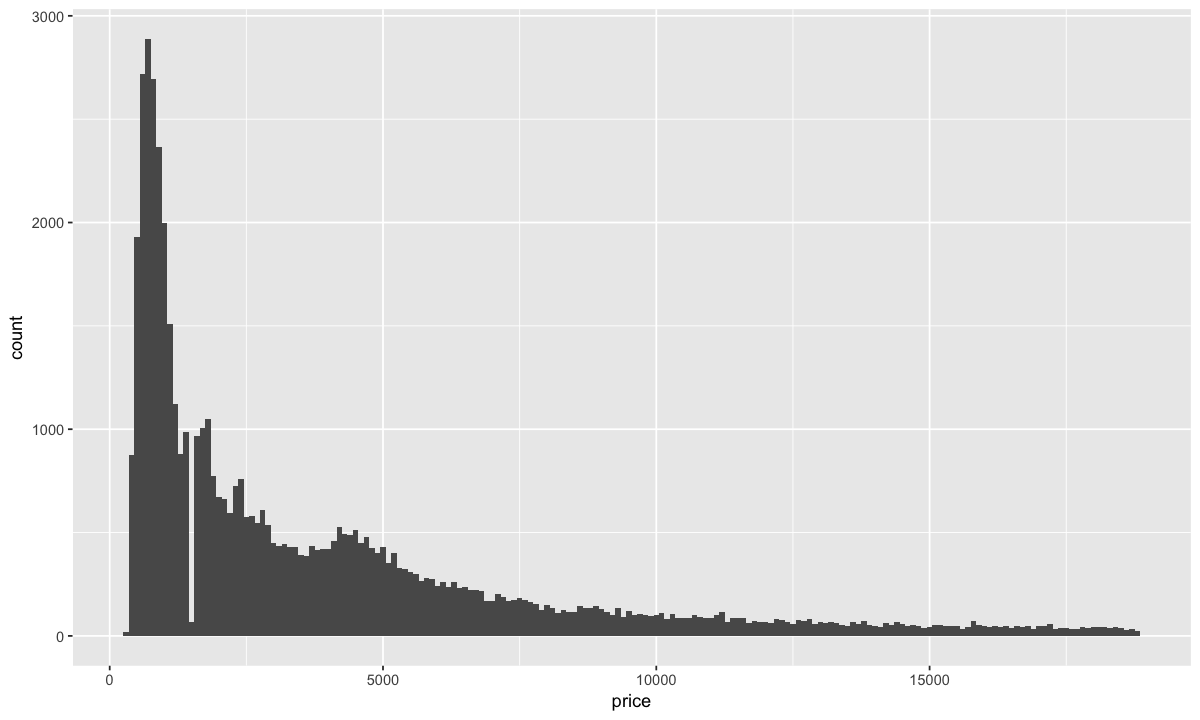

In [95]:
ggplot(data = diamonds) +
    geom_histogram(mapping = aes(x = price), binwidth = 100)

That dip at around $2000 is odd. This is precisely the sort of thing you should be looking for exploring data. Let us examine it more closely.

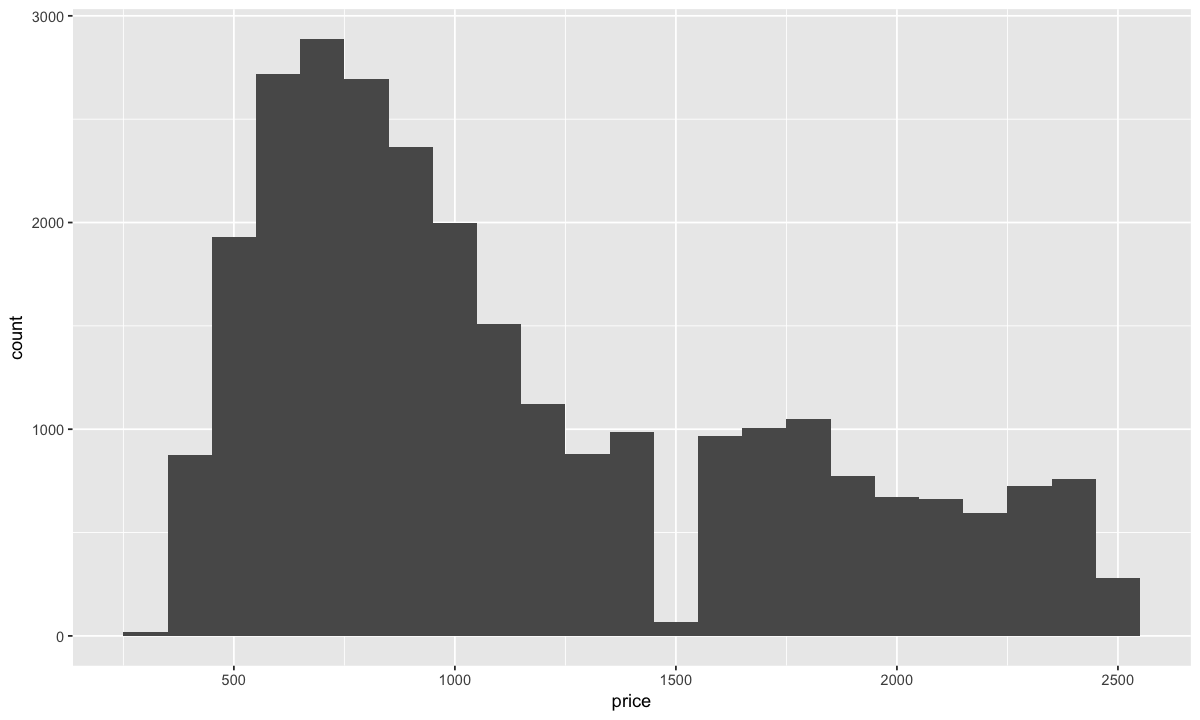

In [22]:
filter(diamonds, price <=  ) %>%
    ggplot() +
    geom_histogram(mapping = aes(x = price), binwidth = 100)

Hmmm... So few diamonds near the price of 1500 USD. What's going on? Let us decrease the bin width to 50 USD. 

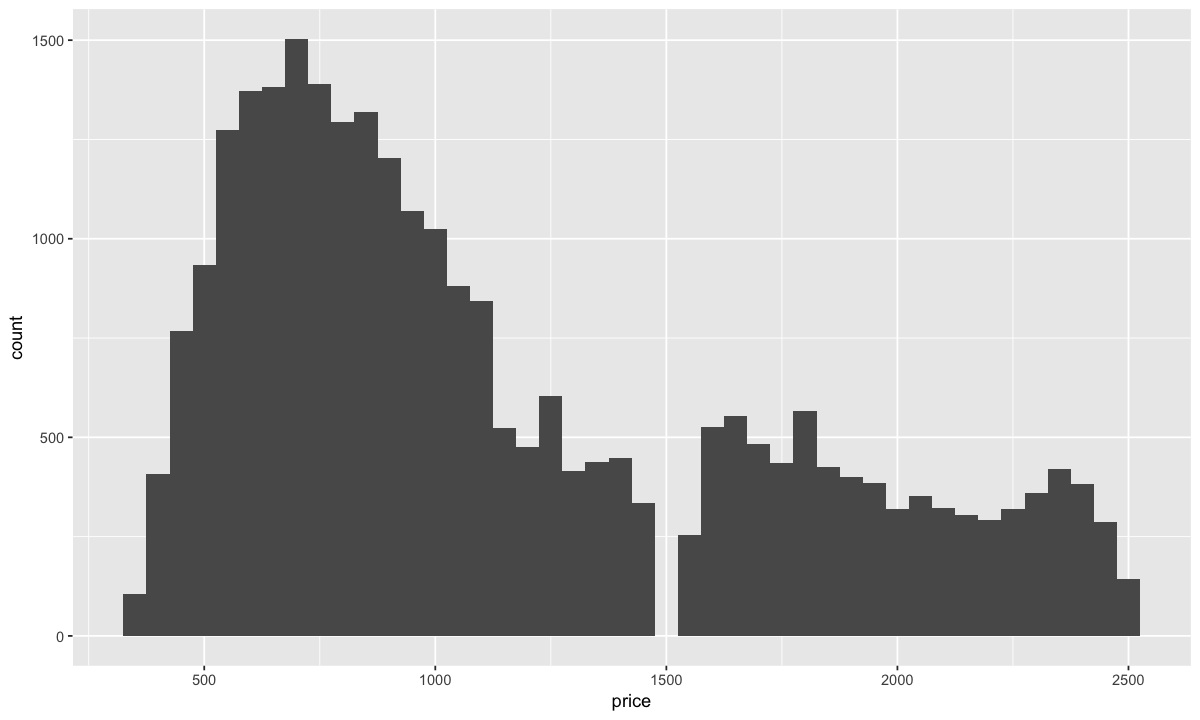

In [23]:
filter(diamonds, price <= 2500) %>%
    ggplot() +
        geom_histogram(mapping = aes(x = price), binwidth = 50)

It really appears that the 1,500 USD price tag is being avoided!!!

In [96]:
arrange(diamonds, price) %>% filter(price > 1452) %>% select(price) %>% print

# A tibble: 33,938 x 1
   price
   <int>
 1  1453
 2  1453
 3  1453
 4  1453
 5  1453
 6  1454
 7  1454
 8  1454
 9  1546
10  1546
# ... with 33,928 more rows


Is this by chance or is there something else going on? Let's look at the differences in price between each distinct value of price:

  price dprice
1  1546 92    
2 15646 19    
3 16169 18    
4 17975 18    
5 17634 17    
6 14014 16    

Warning message:
“Removed 1 rows containing missing values (geom_point).”

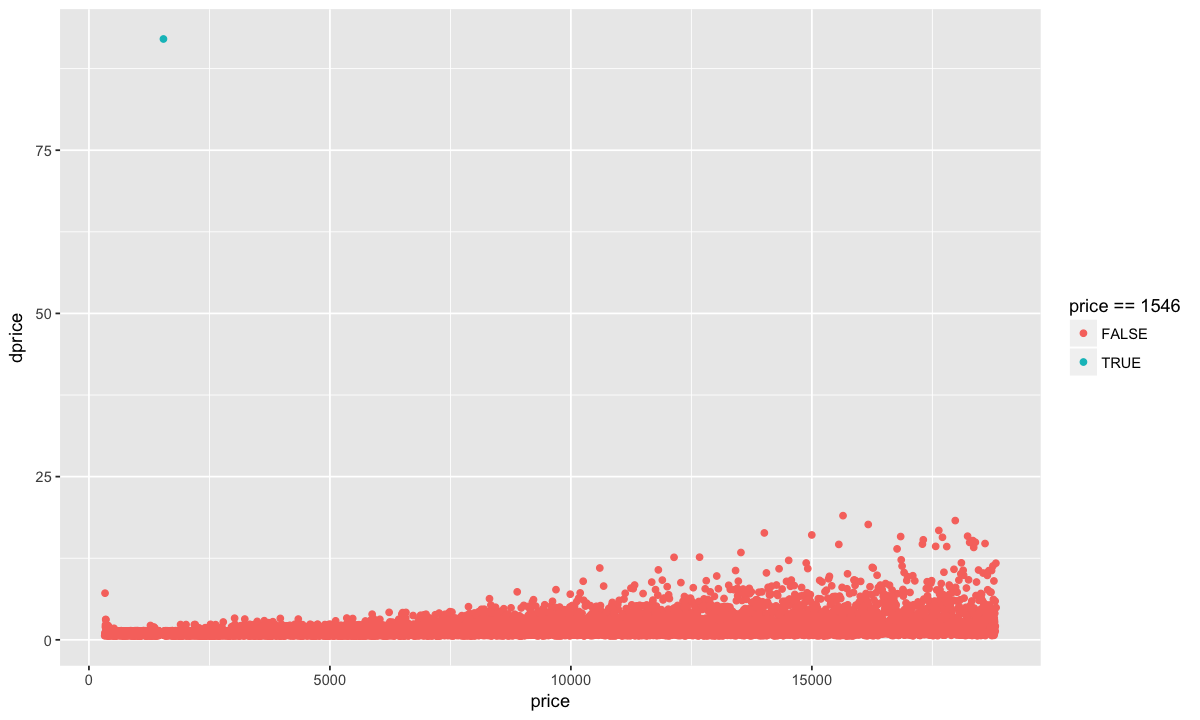

In [25]:
prices = arrange(diamonds, price) %>% distinct(price) %>% .[['price']]
df = data.frame(price=prices, dprice=c(NA, diff(prices)))
head(arrange(df, desc(dprice)))
ggplot(df) + geom_jitter(aes(x=price, y=dprice, color=price==1546))

Now we examine the **carat** distribution.

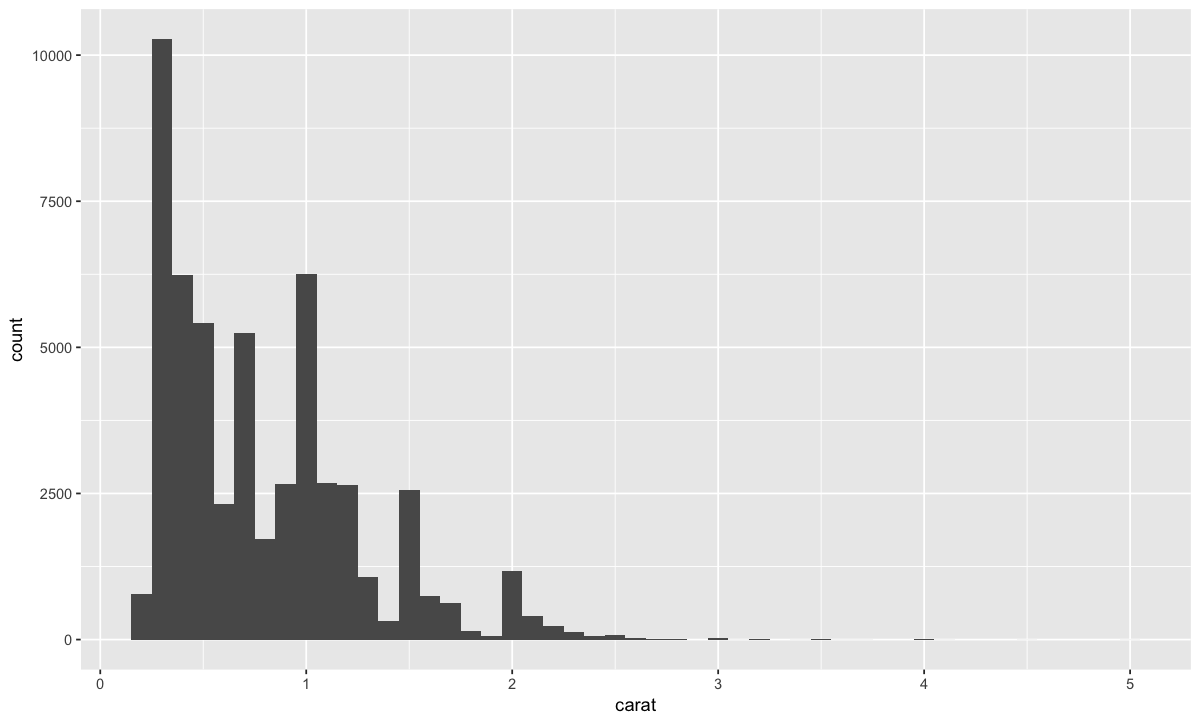

In [99]:
ggplot(data = diamonds) +
    geom_histogram(mapping = aes(x = carat), binwidth = .1)

What's going on near 3? Let us investigate...

In [100]:
filter(diamonds, carat > 3) %>% arrange(carat) %>% print

# A tibble: 32 x 10
   carat cut     color clarity depth table price     x     y     z
   <dbl> <ord>   <ord> <ord>   <dbl> <dbl> <int> <dbl> <dbl> <dbl>
 1  3.01 Premium I     I1       62.7    58  8040  9.1   8.97  5.67
 2  3.01 Premium F     I1       62.2    56  9925  9.24  9.13  5.73
 3  3.01 Fair    H     I1       56.1    62 10761  9.54  9.38  5.31
 4  3.01 Premium G     SI2      59.8    58 14220  9.44  9.37  5.62
 5  3.01 Ideal   J     SI2      61.7    58 16037  9.25  9.2   5.69
 6  3.01 Ideal   J     I1       65.4    60 16538  8.99  8.93  5.86
 7  3.01 Premium I     SI2      60.2    59 18242  9.36  9.31  5.62
 8  3.01 Fair    I     SI2      65.8    56 18242  8.99  8.94  5.9 
 9  3.01 Fair    I     SI2      65.8    56 18242  8.99  8.94  5.9 
10  3.01 Good    I     SI2      63.9    60 18242  9.06  9.01  5.77
# ... with 22 more rows


Okay, now let us zoom into the **carat** range around 1.

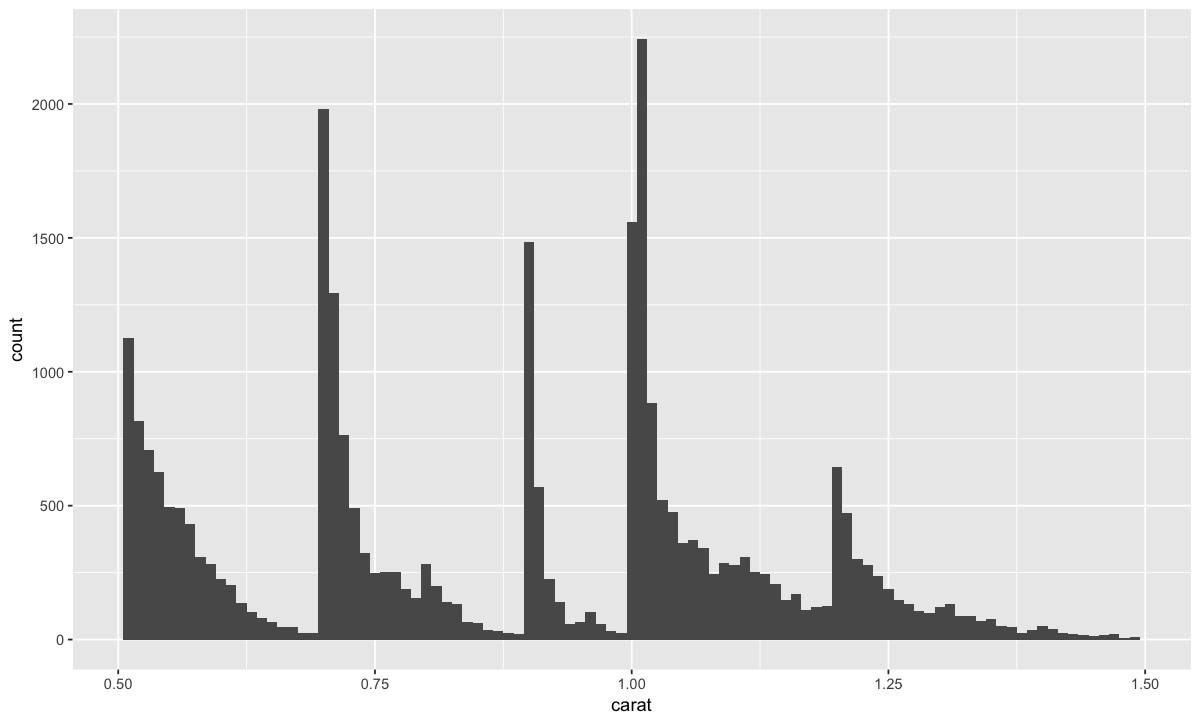

In [28]:
filter(diamonds, carat > 0.5, carat < 1.5) %>% ggplot() + geom_histogram(mapping = aes(x = carat), 
    binwidth = 0.01)

What might explain the strange histogram above? Tendency to round the **carat** values? It seems like certain values are particularly likely to be rounded. Let's refine the plot using the `breaks=` option to investigate further:

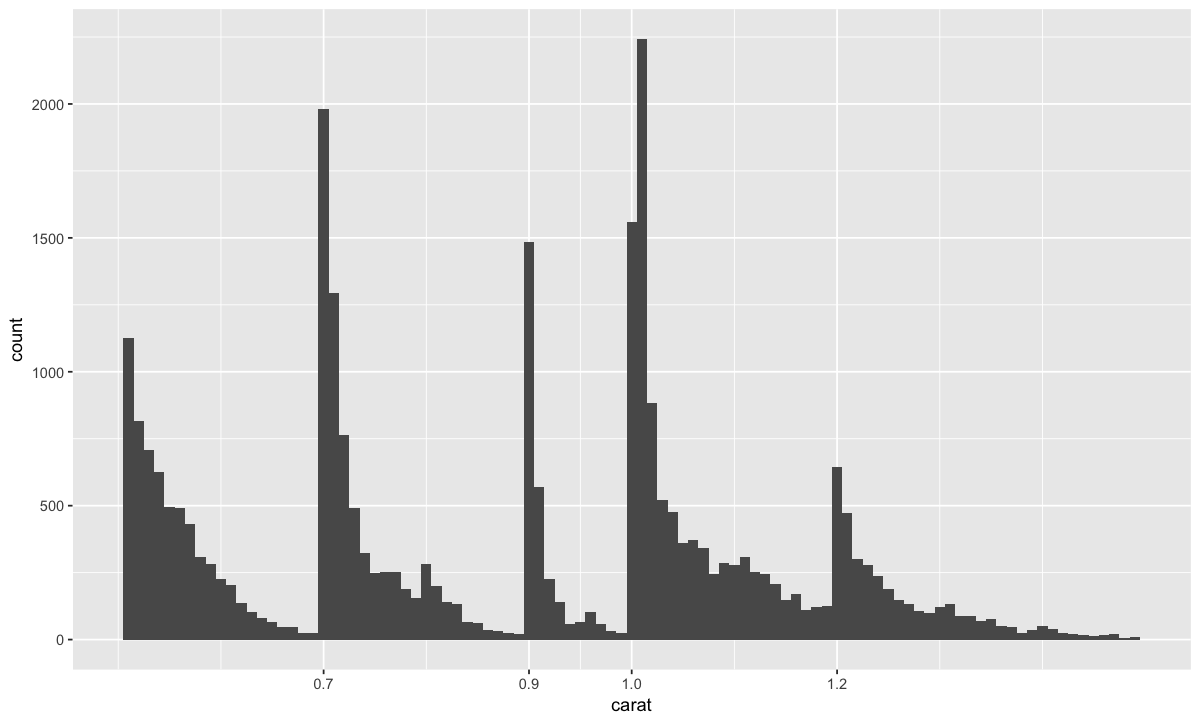

In [29]:
filter(diamonds, carat > 0.5, carat < 1.5) %>% ggplot() + geom_histogram(mapping = aes(x = carat), 
    binwidth = 0.01) + scale_x_continuous(breaks=c(.7,.9,1.,1.2))

Sure enough, there are certain values of carat that people seem to particularly desire.

## Missing Values
We see another funny pattern in diamonds if we look at the dimensional variables $x$, $y$ and $z$:


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


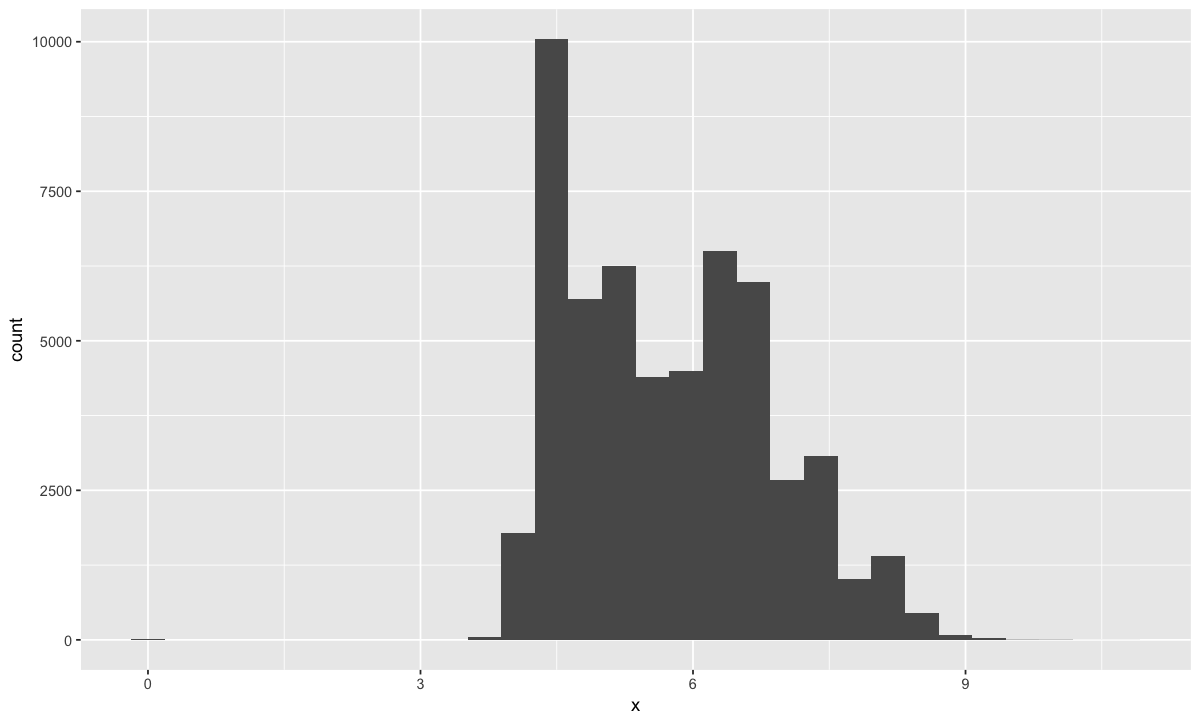

In [30]:
ggplot(diamonds) + geom_histogram(aes(x=x))

We can use the `near` function to filter diamonds which are near to zero in one coordinate.

In [31]:
filter(diamonds, near(x,0) | near(y,0) | near(z, 0)) %>% print

# A tibble: 20 x 10
   carat cut       color clarity depth table price     x     y     z
   <dbl> <ord>     <ord> <ord>   <dbl> <dbl> <int> <dbl> <dbl> <dbl>
 1  1    Premium   G     SI2      59.1    59  3142  6.55  6.48     0
 2  1.01 Premium   H     I1       58.1    59  3167  6.66  6.6      0
 3  1.1  Premium   G     SI2      63      59  3696  6.5   6.47     0
 4  1.01 Premium   F     SI2      59.2    58  3837  6.5   6.47     0
 5  1.5  Good      G     I1       64      61  4731  7.15  7.04     0
 6  1.07 Ideal     F     SI2      61.6    56  4954  0     6.62     0
 7  1    Very Good H     VS2      63.3    53  5139  0     0        0
 8  1.15 Ideal     G     VS2      59.2    56  5564  6.88  6.83     0
 9  1.14 Fair      G     VS1      57.5    67  6381  0     0        0
10  2.18 Premium   H     SI2      59.4    61 12631  8.49  8.45     0
11  1.56 Ideal     G     VS2      62.2    54 12800  0     0        0
12  2.25 Premium   I     SI1      61.3    58 15397  8.52  8.42     0
13  1.2  Premi

Let us create a new data set with the unusual values replaces with NA. That is, we are explicitly marking them as **missing values**. We will use `ifelse()` for this:

In [32]:
diamonds_new <- diamonds %>%
                    mutate(x = ifelse(x < 3 | x > 10, NA, x)) %>%
                    mutate(y = ifelse(y < 3 | y > 20, NA, y)) %>%
                    mutate(z = ifelse(z < 3 | z > 10, NA, z))

Note that we are also treating extreme values as missing in this example. This is fine, so long as you are confident that the extreme values are due to some sort of error or anomaly. 

If they *actually* represent valid data points, then you need to do additional analysis to understand what mechanism generated such values.

It is very important to mark missing data as such in your analysis. Otherwise, your computations can be misleading. For example, consider the min $x$ value in `diamonds` compared to `diamonds_new`:

In [33]:
diamonds %>% summarize(min_x=min(x))
diamonds_new %>% summarize(min_x=min(x))
diamonds_new %>% summarize(min_x=min(x, na.rm=T))

  min_x
1 0    

  min_x
1 NA   

  min_x
1 3.73 

We get a completely different answer, of course. This example is contrived but you can imagine that if a large number of missing values were coded as `0`, as in this example, things like means and regression fits could be substantially altered depending on whether you recoded them as `NA`.

`ggplot()` issues a warning if it encounters missing values.

Warning message:
“Removed 15 rows containing missing values (geom_point).”

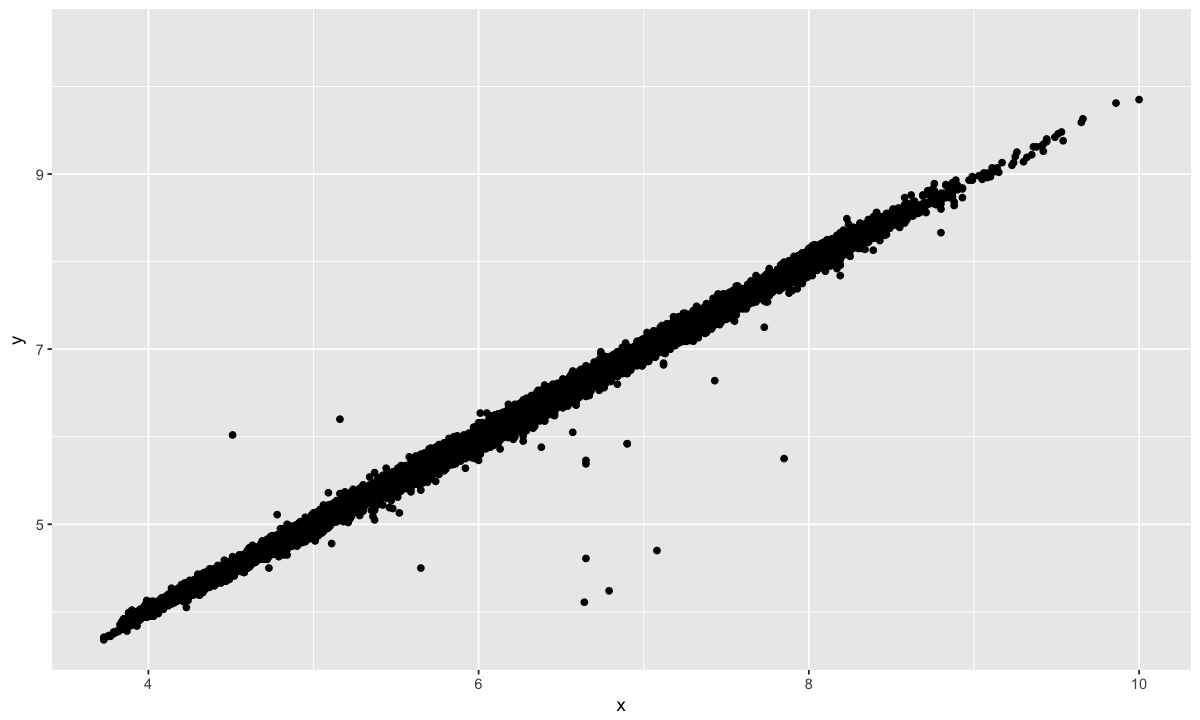

In [34]:
ggplot(data = diamonds_new) +
    geom_point(mapping = aes(x = x, y = y))

You can suppress the warning by supplying the value `TRUE` for the argument `na.rm`.

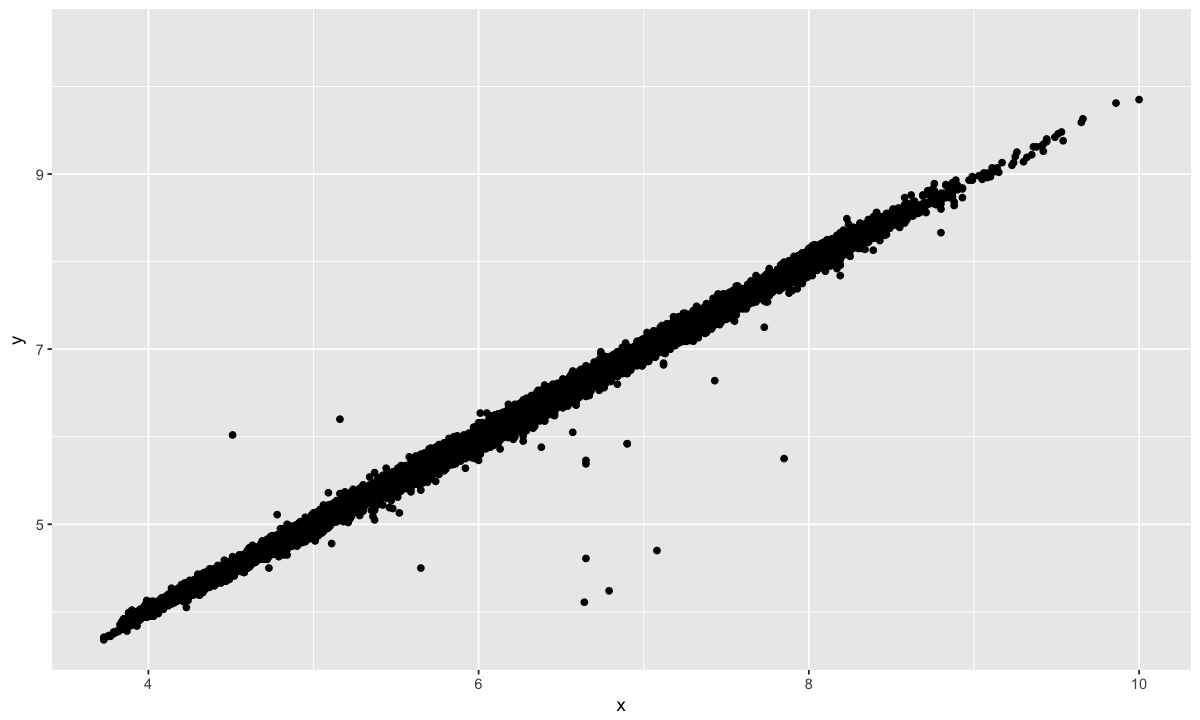

In [35]:
ggplot(data = diamonds_new) +
    geom_point(mapping = aes(x = x, y = y), na.rm = TRUE)